<a href="https://colab.research.google.com/github/albachiarabellaroba/ADM-H1/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algorithmic Methods of Data Mining**

#Academic year 2022–2023

# Homework 2 - Instagram Profiles & Posts

Authors: Barba Paolo, Bellaroba Albachiara, Gasbarri Francesca, Soukaina Alaoui

#Import the packages and upload datasets


In [1]:
import pandas as pd
#import functions as fc
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
locations =pd.read_csv('/content/drive/MyDrive/ADM_HW2/instagram_locations.csv',sep='\t')
profiles =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_profiles.csv",sep='\t')
posts =pd.read_csv("/content/drive/MyDrive/ADM_HW2/instagram_posts.csv",sep='\t',nrows=100000 )
#print(posts)


#Research question 1 Exploratory Data Analysis
## Data summaritation

Show the datasets from Instagram in 2019 Data exploration

In [ ]:
locations.head()

In [ ]:
profiles.head()

In [ ]:
posts.head()

Now we can look at the columns of our datasets in order to understand which variables we are analyze.

In [ ]:
locations.info()

In [ ]:
profiles.info()

In [ ]:
posts.info()

Additional information about the variables can be found in the description of the data section on the web page : https://www.kaggle.com/datasets/shmalex/instagram-dataset?select=instagram_profiles.csv

First of all we are going to first an info into the dataset to quickly understand the variables we are working with, get the numbers of rows and 
columns we have for each dataset

In [ ]:
print("Locations dataframe has " + str(locations.shape[0]) + " observations and "  + str(locations.shape[1]) + " variables")
print("Profiles dataframe has " + str(profiles.shape[0]) + " observations and "  + str(profiles.shape[1]) + " variables")
print("Posts dataframe has " + str(posts.shape[0]) + " observations and "  + str(posts.shape[1]) + " variables")

We are going one step further, having a better understanding of the statistical properties of these dataframes by using describe method that give us basics statistics of all the numerical columns we have.We are doing a statistical summaritation at all the numeric variables that have sense to summarize

In [ ]:
profiles[["following" , "followers" , "n_posts" ]].describe()

,following,followers,n_posts
count,3.452771e+06,3.452771e+06,3.452771e+06
mean,1.405641e+03,4.739899e+03,4.095414e+02
std,8.113473e+03,1.939087e+05,1.041940e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e+02,1.590000e+02,2.200000e+01
50%,7.540000e+02,4.060000e+02,1.200000e+02
75%,1.573000e+03,9.740000e+02,4.200000e+02
max,4.191080e+06,2.854576e+08,1.837300e+05


In [ ]:
posts[["numbr_likes","number_comments"]].describe()

,numbr_likes,number_comments
count,100000.000000,100000.000000
mean,325.856710,7.582170
std,5512.736285,124.782766
min,0.000000,0.000000
25%,20.000000,0.000000
50%,48.000000,2.000000
75%,126.000000,5.000000
max,852230.000000,31655.000000


In order to do a better analysis we want to clean the datasets as much as possible. 
First 

1.   Dealing with duplicates rows:

     we drop every duplicates rows because contengono useless informations 
2.   Dealing with missing values:
     we check the percentage of missing value in each columns, we drop a columns that contains missing values over a set trheshold. After we select some columns of interest and drop the NA (gli darò una spiegazione per sto motivo giuro :D)

3. Dealing with outliers: For some variables of interest we actually have some mistyping or error data that influence so much the distribution, we want to eliminate them according to z-scores ( glie spiego pure questo tranqui  :p ). 



In [ ]:
profiles.drop_duplicates(inplace=True)
posts.drop_duplicates(inplace=True)
locations.drop_duplicates(inplace=True)

In [ ]:
#check for null values / % of null values we have
print('Null values percentage for locations dataset')
print(locations.isnull().sum()/locations.shape[0])
print('\n')
print('Null values percentage for profiles dataset')
print(profiles.isnull().sum()/profiles.shape[0])
print('\n')
print('Null values percentage for posts dataset')
print(posts.isnull().sum()/posts.shape[0])


In [ ]:
posts.numbr_likes.plot(kind="hist",bins=50)

In [ ]:
location= locations.dropna(subset=["quello che voglio"])

In [ ]:
#remove null colums over the threshold
th= len(profiles)*.6
profiles.dropna(thresh = th,axis=1)

In [ ]:
#Convert text to all lower
profiles.desc.astype(str).apply(lambda x: x.lower())

In [ ]:
profiles.followers > profiles.followers.quantile(0.05)

0           True
1           True
2           True
3          False
4          False
           ...  
4509581     True
4509582    False
4509583    False
4509584     True
4509585    False
Name: followers, Length: 4509586, dtype: bool

In [ ]:
data_outliers= profiles[(profiles.followers) < profiles.followers.quantile(0.95)]
data_outliers= data_outliers[(profiles.followers) > profiles.followers.quantile(0.05)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


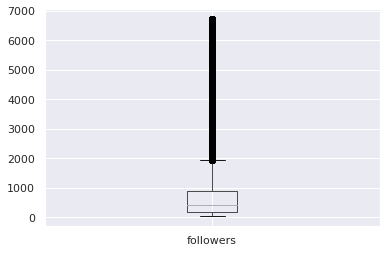

In [ ]:
data_outliers.boxplot('followers')
plt.show()
#the distributions is quite skwnedss

In [ ]:
locations.region.value_count() / locations.regions.notnull().sum()  #give us the percentage of the region

AttributeError: ignored